In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import conexion_bd as cn

%load_ext autoreload
%autoreload 2
import conexion_bd
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extraemos la data necesaria

Vamos a extraer los datos desde nuestra base de datos mysql

In [184]:
df_homicidios = pd.read_sql("SELECT * FROM homicidios_hecho", con= cn.conexion)
df_homicidios

,Id_hecho,Rol,Sexo,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,...,Cruce,Dirección_normalizada,Comuna,Xy_(caba),Pos_x,Pos_y,Participantes,Victima,Acusado,Semestre
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,0 days 04:00:00,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,0 days 01:15:00,...,SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,0 days 07:00:00,...,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,1
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,0 days 00:00:00,...,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,0 days 05:20:00,...,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,0 days 06:20:00,...,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO,2
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,0 days 17:10:00,...,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,0 days 01:10:00,...,SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,0 days 00:43:00,...,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2


In [185]:
# Función para clasificar como primer o segundo semestre
def clasificar_semestre(mes):
    if mes <= 6:
        return "1"
    else:
        return "2"

# Aplicar la función a la columna "MM" y crear una nueva columna "Semestre"
df_homicidios['Semestre'] = df_homicidios['Mes'].apply(clasificar_semestre)

# Concatenar con la columna AAAA
df_homicidios['Año_SEMESTRE'] = df_homicidios['Año'].astype(str) + "_" + df_homicidios['Semestre']

df_homicidios = df_homicidios.drop("Semestre", axis=1)

df_homicidios = df_homicidios.rename(columns={"Año_SEMESTRE": "Semestre"})
df_homicidios

,Id_hecho,Rol,Sexo,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,...,Cruce,Dirección_normalizada,Comuna,Xy_(caba),Pos_x,Pos_y,Participantes,Victima,Acusado,Semestre
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,0 days 04:00:00,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016_1
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,0 days 01:15:00,...,SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016_1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,0 days 07:00:00,...,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016_1
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,0 days 00:00:00,...,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016_1
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,0 days 05:20:00,...,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,0 days 06:20:00,...,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO,2021_2
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,0 days 17:10:00,...,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021_2
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,0 days 01:10:00,...,SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021_2
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,0 days 00:43:00,...,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021_2


Tambien extraemos el dataset auxiliar que contiene población anual por comuna y podemos obtener desde el año 2016 hasta el año 2021

In [186]:
df_poblacion1 = pd.read_excel("../Datos/dataset_poblacion_PBP_CO_1020.xls", sheet_name=0, header=2)
df_poblacion1

,Comuna,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Total,3028481.0,3033639.0,3038860.0,3044076.0,3049229.0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0,3081550.0,3083770.0,3085483.0,3086680
1,1,243946.0,245308.0,246689.0,248069.0,249433.0,250770.0,252053.0,253271.0,254408.0,255457.0,256405.0,257235.0,257934.0,258497.0,258922.0,259205
2,2,150714.0,150573.0,150428.0,150278.0,150130.0,149985.0,149848.0,149720.0,149607.0,149510.0,149430.0,149371.0,149337.0,149328.0,149345.0,149389
3,3,191323.0,191536.0,191750.0,191963.0,192171.0,192375.0,192573.0,192763.0,192945.0,193115.0,193276.0,193425.0,193560.0,193682.0,193790.0,193884
4,4,234933.0,235497.0,236071.0,236646.0,237214.0,237769.0,238303.0,238809.0,239279.0,239712.0,240100.0,240437.0,240716.0,240937.0,241096.0,241193
5,5,185301.0,185544.0,185789.0,186034.0,186276.0,186512.0,186740.0,186956.0,187159.0,187348.0,187518.0,187670.0,187800.0,187907.0,187991.0,188053
6,6,183046.0,183309.0,183576.0,183843.0,184105.0,184363.0,184611.0,184846.0,185067.0,185271.0,185456.0,185620.0,185760.0,185875.0,185964.0,186028
7,7,236838.0,237389.0,237946.0,238505.0,239057.0,239597.0,240116.0,240607.0,241065.0,241484.0,241861.0,242188.0,242460.0,242674.0,242828.0,242921
8,8,219638.0,220655.0,221693.0,222733.0,223764.0,224770.0,225737.0,226649.0,227495.0,228266.0,228953.0,229541.0,230018.0,230380.0,230623.0,230745
9,9,168681.0,168964.0,169248.0,169533.0,169814.0,170087.0,170353.0,170605.0,170842.0,171062.0,171264.0,171444.0,171600.0,171733.0,171839.0,171921


In [187]:
# Eliminar filas a partir del índice 16 (incluyendo el índice 16)
indice_inicio = 1
df_poblacion = df_poblacion1.drop(df_poblacion1.index[indice_inicio:])

In [188]:
# Eliminar columna "Comuna"
df_poblacion = df_poblacion.drop(columns="Comuna")

In [189]:
df_poblacion

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,3028481.0,3033639.0,3038860.0,3044076.0,3049229.0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0,3081550.0,3083770.0,3085483.0,3086680


In [190]:
# Eliminar columnas irrelevantes
columnas_a_eliminar = [2010, 2011, 2012, 2013, 2014, 2022, 2023, 2024, 2025]
df_poblacion = df_poblacion.drop(columns=columnas_a_eliminar)
df_poblacion

,2015,2016,2017,2018,2019,2020,2021
0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0


In [191]:
df_poblacion = df_poblacion.T.reset_index()
df_poblacion

,index,0
0,2015,3054267.0
1,2016,3059122.0
2,2017,3063728.0
3,2018,3068043.0
4,2019,3072029.0
5,2020,3075646.0
6,2021,3078836.0


In [192]:
# Renombrar las columnas
df_poblacion.rename(columns={'index': 'Año',
                         0: 'POBLACION_ANUAL'}, inplace=True)
df_poblacion["Año"] = df_poblacion["Año"].astype(str)
df_poblacion

,Año,POBLACION_ANUAL
0,2015,3054267.0
1,2016,3059122.0
2,2017,3063728.0
3,2018,3068043.0
4,2019,3072029.0
5,2020,3075646.0
6,2021,3078836.0


In [193]:
# Crear un rango de años desde 2015 hasta 2021
rango_anios = list(range(2015, 2022))

# Crear un DataFrame con los años y los semestres (1 y 2)
df_semestres = pd.DataFrame({'Año': [str(anio) for anio in rango_anios for _ in range(2)],
                   'SEM': ["1", "2"] * len(rango_anios)})

# agregar nueva columna
df_semestres["Semestre"] = df_semestres["Año"] + "_" + df_semestres["SEM"]
df_semestres = df_semestres.drop(columns="SEM")
df_semestres

,Año,Semestre
0,2015,2015_1
1,2015,2015_2
2,2016,2016_1
3,2016,2016_2
4,2017,2017_1
5,2017,2017_2
6,2018,2018_1
7,2018,2018_2
8,2019,2019_1
9,2019,2019_2


In [194]:
df_semestres.dtypes

Año         object
Semestre    object
dtype: object

In [195]:
# unir df poblacion y df semestres
df_poblacion = pd.merge(df_poblacion, df_semestres, on="Año", how="left")

# Reordenar las columnas en el orden deseado
column_order = ['Semestre', 'POBLACION_ANUAL']
df_poblacion = df_poblacion[column_order]

df_poblacion

,Semestre,POBLACION_ANUAL
0,2015_1,3054267.0
1,2015_2,3054267.0
2,2016_1,3059122.0
3,2016_2,3059122.0
4,2017_1,3063728.0
5,2017_2,3063728.0
6,2018_1,3068043.0
7,2018_2,3068043.0
8,2019_1,3072029.0
9,2019_2,3072029.0


## KPI 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior .

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100.000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

FORMULA 1: (porcentaje de variación): {[[(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000] - [(Número de homicidios en siniestros viales del semestre actual / Población total del semestre actual) * 100,000]] / [(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000]} * 100.

COLUMNAS:
* Semestre anterior
* Número homicidios semestre anterior
* Poblacion total en el semestre anterior
* Semestre actual
* Número homicidios semestre actual
* Poblacion total en el semestre actual

In [196]:
# crear nuevo df para obtener valores actuales

df_actual = df_homicidios.groupby("Semestre")["Cantidad_victimas"].sum().reset_index()
df_actual = pd.merge(df_actual, df_poblacion, on="Semestre", how="left")
df_actual = df_actual.rename(columns={"Cantidad_victimas": "Cantidad_victimas_SEMESTRE",
                                      "SEMESTRE": "SEMESTRE",
                                      "POBLACION_ANUAL": "POBLACION_ANUAL"})
df_actual

,Semestre,Cantidad_victimas_SEMESTRE,POBLACION_ANUAL
0,2016_1,67,3059122.0
1,2016_2,83,3059122.0
2,2017_1,81,3063728.0
3,2017_2,79,3063728.0
4,2018_1,76,3068043.0
5,2018_2,85,3068043.0
6,2019_1,59,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,56,3075646.0


In [198]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(SEMESTRE: str):
   
    posicion = lista_semestres.index(SEMESTRE)
    return lista_semestres[posicion - 1]

df_actual['Semestre_anterior'] = df_actual['Semestre'].apply(asignar_semestre_anterior)

df_actual

,Semestre,Cantidad_victimas_SEMESTRE,POBLACION_ANUAL,Semestre_anterior
0,2016_1,67,3059122.0,2015_2
1,2016_2,83,3059122.0,2016_1
2,2017_1,81,3063728.0,2016_2
3,2017_2,79,3063728.0,2017_1
4,2018_1,76,3068043.0,2017_2
5,2018_2,85,3068043.0,2018_1
6,2019_1,59,3072029.0,2018_2
7,2019_2,47,3072029.0,2019_1
8,2020_1,31,3075646.0,2019_2
9,2020_2,56,3075646.0,2020_1


In [202]:
# crear nuevo df para obtener valores anteriores
df_anterior = df_homicidios.groupby("Semestre")["Cantidad_victimas"].sum().reset_index()
df_anterior = pd.merge(df_anterior, df_poblacion, on="Semestre", how="left")
df_anterior = df_anterior.rename(columns={"Cantidad_victimas": "Cantidad_victimas_Semestre_anterior",
                                          "Semestre": "Semestre_anterior",
                                          "POBLACION_ANUAL": "Poblacion_anual_anterior"})
df_anterior

,Semestre_anterior,Cantidad_victimas_Semestre_anterior,Poblacion_anual_anterior
0,2016_1,67,3059122.0
1,2016_2,83,3059122.0
2,2017_1,81,3063728.0
3,2017_2,79,3063728.0
4,2018_1,76,3068043.0
5,2018_2,85,3068043.0
6,2019_1,59,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,56,3075646.0


In [203]:
df_kpi_1 = pd.merge(df_actual, df_anterior, on="Semestre_anterior", how="left")
df_kpi_1

,Semestre,Cantidad_victimas_SEMESTRE,POBLACION_ANUAL,Semestre_anterior,Cantidad_victimas_Semestre_anterior,Poblacion_anual_anterior
0,2016_1,67,3059122.0,2015_2,NaN,NaN
1,2016_2,83,3059122.0,2016_1,67.0,3059122.0
2,2017_1,81,3063728.0,2016_2,83.0,3059122.0
3,2017_2,79,3063728.0,2017_1,81.0,3063728.0
4,2018_1,76,3068043.0,2017_2,79.0,3063728.0
5,2018_2,85,3068043.0,2018_1,76.0,3068043.0
6,2019_1,59,3072029.0,2018_2,85.0,3068043.0
7,2019_2,47,3072029.0,2019_1,59.0,3072029.0
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0
9,2020_2,56,3075646.0,2020_1,31.0,3075646.0


In [204]:
tasa_anterior = (df_kpi_1["Cantidad_victimas_Semestre_anterior"] / df_kpi_1["Poblacion_anual_anterior"]) * 100000
tasa_actual = (df_kpi_1["Cantidad_victimas_SEMESTRE"] / df_kpi_1["POBLACION_ANUAL"]) * 100000

df_kpi_1["KPI_1"] = (((tasa_anterior - tasa_actual) / tasa_anterior) * 100).round(2)
df_kpi_1

,Semestre,Cantidad_victimas_SEMESTRE,POBLACION_ANUAL,Semestre_anterior,Cantidad_victimas_Semestre_anterior,Poblacion_anual_anterior,KPI_1
0,2016_1,67,3059122.0,2015_2,NaN,NaN,NaN
1,2016_2,83,3059122.0,2016_1,67.0,3059122.0,-23.88
2,2017_1,81,3063728.0,2016_2,83.0,3059122.0,2.56
3,2017_2,79,3063728.0,2017_1,81.0,3063728.0,2.47
4,2018_1,76,3068043.0,2017_2,79.0,3063728.0,3.93
5,2018_2,85,3068043.0,2018_1,76.0,3068043.0,-11.84
6,2019_1,59,3072029.0,2018_2,85.0,3068043.0,30.68
7,2019_2,47,3072029.0,2019_1,59.0,3072029.0,20.34
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0,34.12
9,2020_2,56,3075646.0,2020_1,31.0,3075646.0,-80.65


posx and posy should be finite values
posx and posy should be finite values


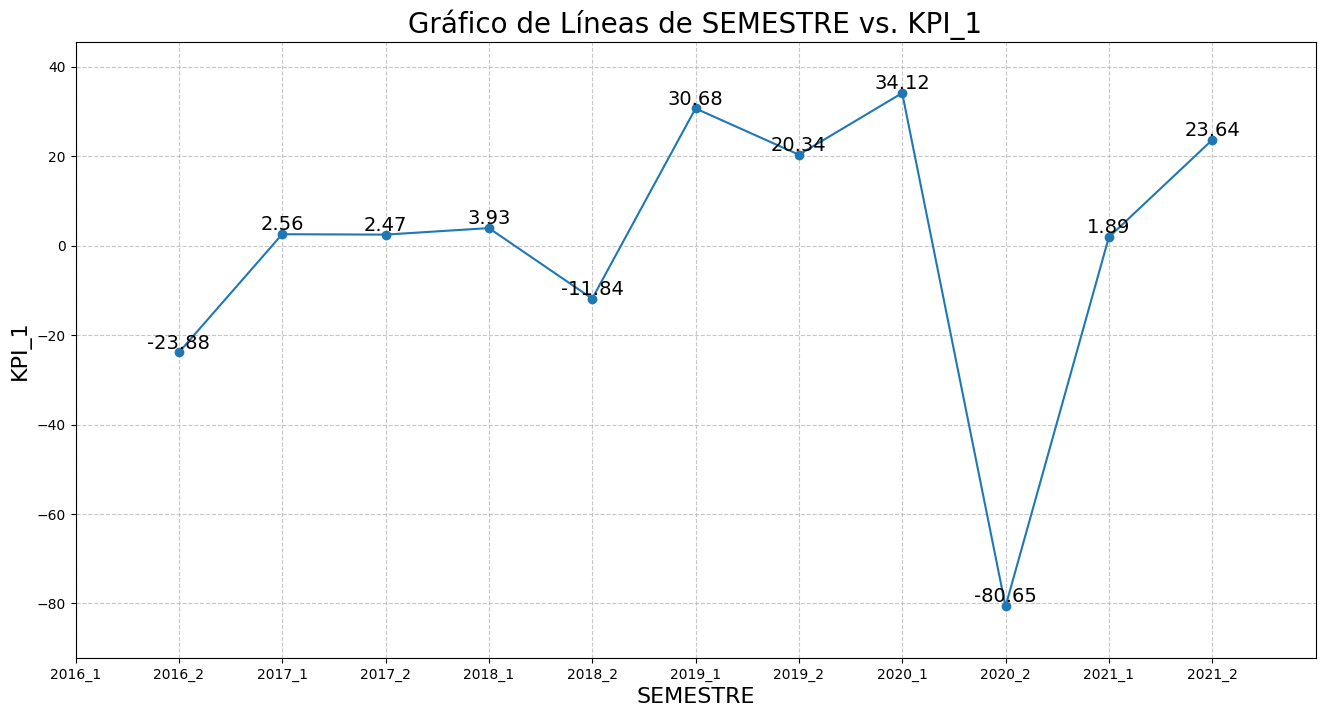

In [208]:
# Definimos los datos
semestre = df_kpi_1["Semestre"]
kpi = df_kpi_1["KPI_1"]

# Cambiamos el tamaño del gráfico
plt.figure(figsize=(16, 8))

# Aumentamos el tamaño de fuente del título y las etiquetas
plt.title("Gráfico de Líneas de SEMESTRE vs. KPI_1", fontsize=20)
plt.xlabel("SEMESTRE", fontsize=16)
plt.ylabel("KPI_1", fontsize=16)

# Ajustamos el margen del gráfico
plt.margins(0.1, 0.1)

# Creamos el gráfico de líneas
plt.plot(semestre, kpi, marker='o', linestyle='-')

# Agregamos etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom', fontsize=14)

# Mostramos el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Antes de concluir con el respectivo analisis sobre el kpi, debemos tener en cuenta lo siguiente:

* Dado que no tenemos datos previos al año 2016-1 nuestra primer medida relaciona el semestre 2016-1 y 2016-2 por eso solo se evidencian valores a partir del semestre 2016-2.

* Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos homicidios que el semestre pasado.

* Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el semestre anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la tasa de homicidios en accidentes de tránsito del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 10% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

* 2017-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

* 2019-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

* 2019-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue menor que el logrado el semestre anterior.

* 2021-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

Margen de mejora

Aunque la tendencia general es positiva, todavía hay margen de mejora. Solo cuatro de los once semestres analizados cumplieron con el objetivo de reducir la tasa de homicidios en un 10%.

Para seguir reduciendo la tasa de homicidios en siniestros viales, se recomienda:

* Ampliar las campañas de concientización sobre la seguridad vial, especialmente entre los jóvenes y los conductores de riesgo.
* Continuar con la inversión en infraestructura vial segura.
* Fortalecer la fiscalización del cumplimiento de las normas de tránsito.

## KPI 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior .

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaron en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

FORMULA 2: (porcentaje de variación): [(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior)] * 100.

COLUMNAS:
* Victima = MOTO
* Año anterior
* Número accidentes año anterior
* Año actual
* Número accidentes año actual

In [209]:
# filtrar df para consultas del kpi
filtro = "MOTO"
df_filtro = df_homicidios[df_homicidios["Victima"] == filtro]
df_filtro

,Id_hecho,Rol,Sexo,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,...,Cruce,Dirección_normalizada,Comuna,Xy_(caba),Pos_x,Pos_y,Participantes,Victima,Acusado,Semestre
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,0 days 04:00:00,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016_1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,0 days 07:00:00,...,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016_1
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,0 days 00:00:00,...,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016_1
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,0 days 05:20:00,...,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016_1
5,2016-0008,CONDUCTOR,MASCULINO,30,1,2016-01-24,2016,1,24,0 days 18:30:00,...,SI,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,2016_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2021-0089,CONDUCTOR,MASCULINO,41,1,2021-12-02,2021,12,2,0 days 01:10:00,...,NO,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO,2021_2
711,2021-0091,CONDUCTOR,MASCULINO,24,1,2021-12-11,2021,12,11,0 days 23:00:00,...,SI,"BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO,2021_2
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,0 days 17:10:00,...,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021_2
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,0 days 01:10:00,...,SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021_2


Luego de filtrar por Moto, obtenemos 302 registros

Creamos un dataframe con valores actuales

In [211]:
df_new = df_filtro.groupby("Año")["Victima"].count().reset_index()
df_new = df_new.rename(columns={"Victima": "Accidentes"})
df_new["Victima"] = filtro
df_new = df_new[["Victima", "Año", "Accidentes"]]
df_new

,Victima,Año,Accidentes
0,MOTO,2016,65
1,MOTO,2017,56
2,MOTO,2018,57
3,MOTO,2019,50
4,MOTO,2020,28
5,MOTO,2021,46


In [212]:
# agregar semestre anterior como llave de union

df_new['Año_anterior'] = df_new['Año']-1
df_new

,Victima,Año,Accidentes,Año_anterior
0,MOTO,2016,65,2015
1,MOTO,2017,56,2016
2,MOTO,2018,57,2017
3,MOTO,2019,50,2018
4,MOTO,2020,28,2019
5,MOTO,2021,46,2020


Ahora crearemos un dataframe para obtener valores anteriores

In [213]:
df_anterior = df_filtro.groupby("Año")["Victima"].count().reset_index()
df_anterior = df_anterior.rename(columns={"Victima": "Accidentes_anterior",
                                          "Año": "Año_anterior"})
df_anterior

,Año_anterior,Accidentes_anterior
0,2016,65
1,2017,56
2,2018,57
3,2019,50
4,2020,28
5,2021,46


Uniremos ambos dataframes

In [214]:
df_kpi_2 = pd.merge(df_new, df_anterior, on="Año_anterior", how="left")
df_kpi_2

,Victima,Año,Accidentes,Año_anterior,Accidentes_anterior
0,MOTO,2016,65,2015,NaN
1,MOTO,2017,56,2016,65.0
2,MOTO,2018,57,2017,56.0
3,MOTO,2019,50,2018,57.0
4,MOTO,2020,28,2019,50.0
5,MOTO,2021,46,2020,28.0


Ahora podemos aplicar la formula y obtener nuestra columna kpi2

In [215]:
anterior = df_kpi_2["Accidentes_anterior"]
actual = df_kpi_2["Accidentes"]

df_kpi_2["KPI_2"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_2

,Victima,Año,Accidentes,Año_anterior,Accidentes_anterior,KPI_2
0,MOTO,2016,65,2015,NaN,NaN
1,MOTO,2017,56,2016,65.0,13.85
2,MOTO,2018,57,2017,56.0,-1.79
3,MOTO,2019,50,2018,57.0,12.28
4,MOTO,2020,28,2019,50.0,44.00
5,MOTO,2021,46,2020,28.0,-64.29


posx and posy should be finite values
posx and posy should be finite values


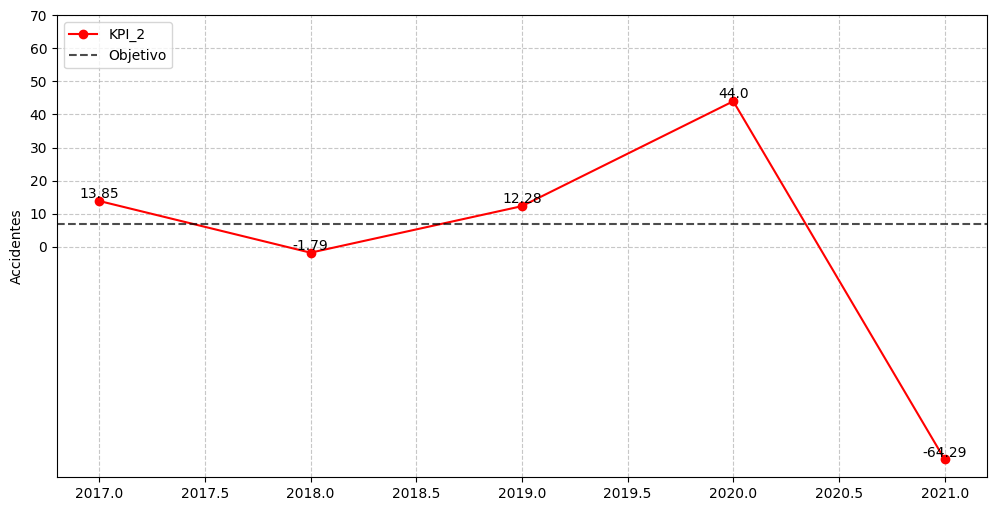

In [217]:
semestre = df_kpi_2["Año"]
kpi = df_kpi_2["KPI_2"]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(semestre, kpi, marker='o', linestyle='-', color="red")
plt.axhline(y=7, color="black", linestyle='--', alpha=0.7)
plt.legend(["KPI_2", "Objetivo"], loc="upper left")
plt.yticks(np.arange(0, 71, 10))
plt.ylabel("Accidentes", color="black")

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Consideraciones a tener en cuenta:

* Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el año 2016 y 2017 por eso solo se evidencian valores a partir del año 2017.

* Si el valor del año en la gráfica es positivo significa que para ese año hubo menos homicidios que el año pasado.

* Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el año anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de homicidios en accidentes de motos del año anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 7% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

* 2017: En comparación con el año anterior se redujeron los homicidios y dado que no tenemos valores para el año anterior no podemos decir si fue mayor o menor respecto de ese año.

* 2019: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

* 2020: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

3 años de 5 cumplieron el objetivo lo cual nos indica que es positivo el balance de acuerdo a lo planteado inicialmente

2 años de 5 tienen un porcentaje de cambio negativo, es decir, aumenta la tasa de accidentes en moto vs. el año anterior. Aunque es minoría sigue siendo alarmante la cantidad

En particular, se recomienda:

* Ampliar las campañas de concientización sobre la seguridad vial para motociclistas, para llegar a un mayor número de personas.
* Fortalecer la fiscalización del cumplimiento de las normas de tránsito por parte de los motociclistas, para disuadir a los infractores.
* Considerar la implementación de medidas adicionales, como la mejora de la atención médica de emergencia para víctimas de accidentes de tránsito.

## KPI 3

Para este kpi se a tomado en cuenta el planteamiento del analista, dando libertad a la manipulacion de los datos y de esta manera se llega a proponer lo siguiente:

* Reducir en un 5% la incidencia de accidentes mortales ocasionados por el mayor responsable de siniestros viales en CABA, en comparación con el semestre anterior.

FORMULA 3: (porcentaje de variación): {(número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior - número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre actual) / (número de accidentes mortales ocasionados por el mayor responsable de siniestros viales del ultimo semestre en el semestre anterior)} * 100.

COLUMNAS:
* Mayor responsable de accidentes
* Semestre anterior
* Número accidentes semestre anterior
* Semestre actual
* Número accidentes semestre actual

In [220]:
# encontrar el ultimo semestre
lista_filtro_1 = df_homicidios["Semestre"].unique().tolist()
filtro_1 = sorted(lista_filtro_1, reverse=True)[0]



In [226]:
# filtrar por el ultimo semestre
df_filtro_1 = df_homicidios[df_homicidios["Semestre"] == filtro_1]

# encontrar el mayor responsable de accidentes despues de filtrar el último semestre
df_filtro_2 = df_filtro_1["Acusado"].value_counts().sort_values(ascending=False).reset_index()
filtro_2 = df_filtro.loc[0,"Acusado"]

In [227]:
# filtrar df para consultas del kpi
df_selec = df_homicidios[df_homicidios["Acusado"] == filtro_2]
df_selec

,Id_hecho,Rol,Sexo,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,...,Cruce,Dirección_normalizada,Comuna,Xy_(caba),Pos_x,Pos_y,Participantes,Victima,Acusado,Semestre
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,0 days 04:00:00,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016_1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,0 days 07:00:00,...,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016_1
6,2016-0009,PASAJERO_ACOMPAÑANTE,MASCULINO,29,1,2016-01-24,2016,1,24,0 days 19:10:00,...,SI,"NOGOYA y GONZALEZ, JOAQUIN V.",11,Point (96545.87592078 102330.67262199),-58.50095869,-34.60825440,MOTO-AUTO,MOTO,AUTO,2016_1
7,2016-0010,CONDUCTOR,MASCULINO,18,1,2016-01-29,2016,1,29,0 days 15:20:00,...,SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,MOTO-AUTO,MOTO,AUTO,2016_1
9,2016-0013,PEATON,MASCULINO,16,1,2016-02-10,2016,2,10,0 days 11:30:00,...,NO,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO,2016_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2021-0089,CONDUCTOR,MASCULINO,41,1,2021-12-02,2021,12,2,0 days 01:10:00,...,NO,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO,2021_2
711,2021-0091,CONDUCTOR,MASCULINO,24,1,2021-12-11,2021,12,11,0 days 23:00:00,...,SI,"BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO,2021_2
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,0 days 06:20:00,...,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO,2021_2
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,0 days 17:10:00,...,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021_2


In [229]:
# crear nuevo df para obtener valores actuales

df_new1 = df_selec.groupby("Semestre")["Acusado"].count().reset_index()
df_new1 = df_new1.rename(columns={"Acusado": "Accidentes"})
df_new1["Acusado"] = filtro_2
df_new1 = df_new1[["Acusado", "Semestre", "Accidentes"]]
df_new1

,Acusado,Semestre,Accidentes
0,AUTO,2016_1,18
1,AUTO,2016_2,21
2,AUTO,2017_1,21
3,AUTO,2017_2,19
4,AUTO,2018_1,19
5,AUTO,2018_2,20
6,AUTO,2019_1,23
7,AUTO,2019_2,11
8,AUTO,2020_1,8
9,AUTO,2020_2,19


In [230]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(Semestre: str):
    '''
    Asignar semestre anterior de acuerdo a una lista de semestres preestablecida.
    Recibe como parámetro un semestre en formato str de la forma AAAA_SEMESTRE
    '''
    posicion = lista_semestres.index(Semestre)
    return lista_semestres[posicion - 1]

df_new1['Semestre_anterior'] = df_new1['Semestre'].apply(asignar_semestre_anterior)

df_new1

,Acusado,Semestre,Accidentes,Semestre_anterior
0,AUTO,2016_1,18,2015_2
1,AUTO,2016_2,21,2016_1
2,AUTO,2017_1,21,2016_2
3,AUTO,2017_2,19,2017_1
4,AUTO,2018_1,19,2017_2
5,AUTO,2018_2,20,2018_1
6,AUTO,2019_1,23,2018_2
7,AUTO,2019_2,11,2019_1
8,AUTO,2020_1,8,2019_2
9,AUTO,2020_2,19,2020_1


In [231]:
# crear nuevo df para obtener valores anteriores

df_anterior1 = df_selec.groupby("Semestre")["Acusado"].count().reset_index()
df_anterior1 = df_anterior1.rename(columns={"Acusado": "Accidentes_anterior",
                                          "Semestre": "Semestre_anterior"})
df_anterior1

,Semestre_anterior,Accidentes_anterior
0,2016_1,18
1,2016_2,21
2,2017_1,21
3,2017_2,19
4,2018_1,19
5,2018_2,20
6,2019_1,23
7,2019_2,11
8,2020_1,8
9,2020_2,19


In [232]:
# unir df actual y df anterior

df_kpi_3 = pd.merge(df_new1, df_anterior1, on="Semestre_anterior", how="left")
df_kpi_3

,Acusado,Semestre,Accidentes,Semestre_anterior,Accidentes_anterior
0,AUTO,2016_1,18,2015_2,NaN
1,AUTO,2016_2,21,2016_1,18.0
2,AUTO,2017_1,21,2016_2,21.0
3,AUTO,2017_2,19,2017_1,21.0
4,AUTO,2018_1,19,2017_2,19.0
5,AUTO,2018_2,20,2018_1,19.0
6,AUTO,2019_1,23,2018_2,20.0
7,AUTO,2019_2,11,2019_1,23.0
8,AUTO,2020_1,8,2019_2,11.0
9,AUTO,2020_2,19,2020_1,8.0


In [233]:
anterior = df_kpi_3["Accidentes_anterior"]
actual = df_kpi_3["Accidentes"]

df_kpi_3["KPI_3"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_3

,Acusado,Semestre,Accidentes,Semestre_anterior,Accidentes_anterior,KPI_3
0,AUTO,2016_1,18,2015_2,NaN,NaN
1,AUTO,2016_2,21,2016_1,18.0,-16.67
2,AUTO,2017_1,21,2016_2,21.0,0.00
3,AUTO,2017_2,19,2017_1,21.0,9.52
4,AUTO,2018_1,19,2017_2,19.0,0.00
5,AUTO,2018_2,20,2018_1,19.0,-5.26
6,AUTO,2019_1,23,2018_2,20.0,-15.00
7,AUTO,2019_2,11,2019_1,23.0,52.17
8,AUTO,2020_1,8,2019_2,11.0,27.27
9,AUTO,2020_2,19,2020_1,8.0,-137.50


posx and posy should be finite values
posx and posy should be finite values


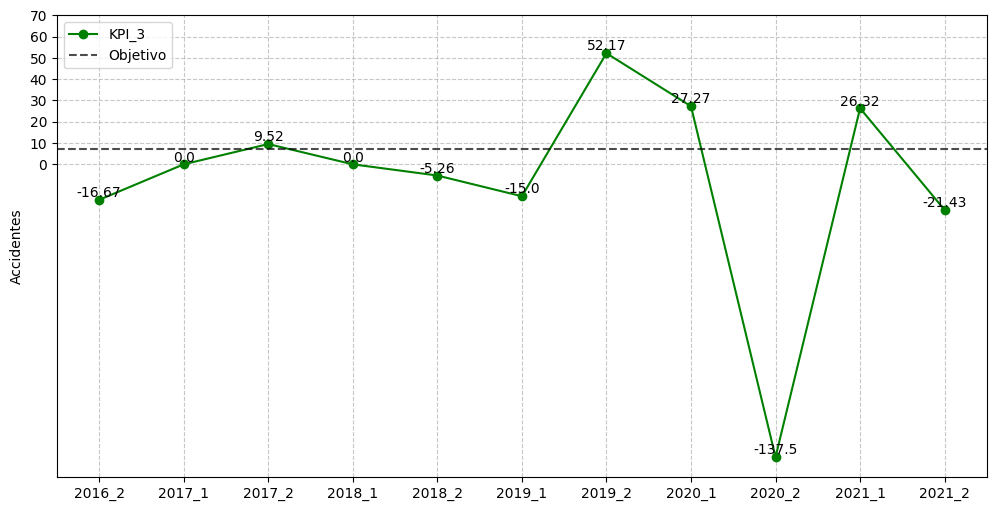

In [236]:
semestre = df_kpi_3["Semestre"]
kpi = df_kpi_3["KPI_3"]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(semestre, kpi, marker='o', linestyle='-', color="green")

# Agregar línea horizontal
plt.axhline(y=7, color="black", linestyle='--', alpha=0.7)

# Agregar leyenda
plt.legend(["KPI_3", "Objetivo"], loc="upper left")

# Agregar escala de colores
plt.yticks(np.arange(0, 71, 10))
plt.ylabel("Accidentes", color="black")

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


El mayor responsable de accidentes de tránsito del último semestre (2021-2) es el auto por está razón de realiza todo el análisis para este acusado.

* Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el semestre 2016_1 y 2016_2 por eso solo se evidencian valores a partir del semestre 2016_2.

* Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos accidentes ocasionados por autos que el semestre pasado.

* Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes ocasionados por autos vs. el semestre anterior aumentó de manera positiva.

El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de accidentes causados por autos del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 5% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

* 2017_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado..

* 2019_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

* 2020_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es menor que la del semestre pasado.

* 2021_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

4 semestres de 11 cumplieron el objetivo lo cual nos indica que no es positivo el balance de acuerdo a lo planteado inicialmente

5 semestres de 11 tienen un porcentaje de cambio negativo, es decir, aumentan los accidentes ocasionados vs. el semestre anterior. Aunque es minoría sigue siendo alarmante la cantidad

## Carga de los datos

Procedmos a cargar la data ya procesada para cada kpi en nuestra base de datos, de esta manera seria mucho mas efciente graficar y reproducir en nuestro dasbohard 

In [237]:
# Cargamos en la primera btabla
df_kpi_1.to_sql("kpi_1", con= cn.engine, index= False, if_exists="replace")

# Cargamos la segunda tabla
df_kpi_2.to_sql("kpi_2", con=cn.engine, index= False, if_exists="replace")

# Cargamos la tercera tabla
df_kpi_3.to_sql("kpi_3", con= cn.engine, index= False, if_exists="replace")

12